# EDA Visualizacion

##### Integrantes: 
##### - Harold Aquino Curisinche 
##### - Rosa Estrada Estrada
##### Descripción: Exploración y visualización de los datos de reclamos de SUSALUD

## Importación de librerías

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Configuración de gráficos
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2)

In [61]:
# === 2. Cargar el dataset limpio ===
df = pd.read_csv("../data/processed/reclamos_clean_transformed.csv", low_memory=False)

In [6]:
# Convertir fechas al tipo datetime (por si no se guardaron correctamente)
#df["FE_PRESEN_RECLA"] = pd.to_datetime(df["FE_PRESEN_RECLA"])
#df["FE_RESULT_RECL"] = pd.to_datetime(df["FE_RESULT_RECL"])
#df["FE_NOTIFI_RESULT"] = pd.to_datetime(df["FE_NOTIFI_RESULT"])

In [37]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162639 entries, 0 to 162638
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ID_PERIODO             162639 non-null  int64 
 1   DE_TIPO_ADMINISTRADO   162639 non-null  object
 2   DE_TIPO_INSTITUCION    162639 non-null  object
 3   DE_MEDIO_PRESENTACION  162639 non-null  object
 4   CO_UNICO_RECLAMO       162639 non-null  object
 5   DE_MEDIO_RECEPCION     162639 non-null  object
 6   FE_PRESEN_RECLA        162639 non-null  object
 7   DE_SERVICIO            162639 non-null  object
 8   DE_COMPETENCIA         162639 non-null  object
 9   DE_CLASIF_1            162639 non-null  object
 10  DE_CLASIF_2            162639 non-null  object
 11  DE_CLASIF_3            162639 non-null  object
 12  DE_ESTADO_RECLAMO      162639 non-null  object
 13  DE_ETAPA_RECLAMO       162639 non-null  object
 14  DE_TIPO_ADMIN_DERIVA   162639 non-null  object
 15  

In [39]:
# Resumen estadístico
print("\nResumen estadístico:")
print(df.describe())


Resumen estadístico:
          ID_PERIODO            AÑO            MES  DURACION_RECLAMO
count  162639.000000  162639.000000  162639.000000     162639.000000
mean   202259.912702    2022.058061       6.330173         14.369991
std        96.781974       1.005160       3.476604         59.563773
min    202101.000000    2011.000000       1.000000      -7305.000000
25%    202204.000000    2021.000000       3.000000          0.000000
50%    202301.000000    2022.000000       6.000000          0.000000
75%    202310.000000    2023.000000       9.000000          7.000000
max    202406.000000    2024.000000      12.000000       4059.000000


In [41]:
df.head()

,ID_PERIODO,DE_TIPO_ADMINISTRADO,DE_TIPO_INSTITUCION,DE_MEDIO_PRESENTACION,CO_UNICO_RECLAMO,DE_MEDIO_RECEPCION,FE_PRESEN_RECLA,DE_SERVICIO,DE_COMPETENCIA,DE_CLASIF_1,...,DE_TIPO_ADMIN_DERIVA,DE_RESULTADO,DE_MOTIVO_CONCL_ANTIC,FE_RESULT_RECL,DE_COMUN_RESULT,FE_NOTIFI_RESULT,AÑO,MES,DURACION_RECLAMO,CATEGORIA_DURACION
0,202101,IAFAS,IAFAS,Físico,20007-352,Libro de Reclamaciones Físico,2020-11-27,-,Si,Negar o demora en otorgar la cobertura en salud,...,-,Infundado,-,2020-12-21,Correo electrónico,2020-12-21,2020,11,24,Medio (8-30 días)
1,202101,IAFAS,IAFAS,Físico,20007-360,Libro de Reclamaciones Físico,2021-01-04,-,Si,Cobrar indebidamente,...,-,Infundado,-,2021-02-18,Correo electrónico,2021-02-18,2021,1,45,Largo (31-90 días)
2,202101,IAFAS,IAFAS,Físico,20007-361,Libro de Reclamaciones Físico,2021-01-06,-,Si,Otros relativos a las IAFAS,...,-,Infundado,-,2021-01-20,Correo electrónico,2021-01-20,2021,1,14,Medio (8-30 días)
3,202101,IAFAS,IAFAS,Físico,20007-364,Libro de Reclamaciones Físico,2021-01-06,-,Si,Otros relativos a las IAFAS,...,-,Infundado,-,2021-01-25,Correo electrónico,2021-01-25,2021,1,19,Medio (8-30 días)
4,202101,IAFAS,IAFAS,Físico,20007-365,Libro de Reclamaciones Físico,2021-01-08,-,Si,Otros relativos a las IAFAS,...,-,Pendiente,-,2021-01-08,-,NaN,2021,1,0,Corto (0-7 días)


In [43]:
# Verificar valores únicos en variables categóricas
print("\nValores únicos por columna categórica:")
for col in ["DE_TIPO_ADMINISTRADO", "DE_MEDIO_PRESENTACION", "DE_SERVICIO", "DE_ESTADO_RECLAMO"]:
    print(f"{col}: {df[col].nunique()} valores únicos")



Valores únicos por columna categórica:
DE_TIPO_ADMINISTRADO: 1 valores únicos
DE_MEDIO_PRESENTACION: 4 valores únicos
DE_SERVICIO: 15 valores únicos
DE_ESTADO_RECLAMO: 6 valores únicos


Text(0, 0.5, 'Cantidad de Reclamos')

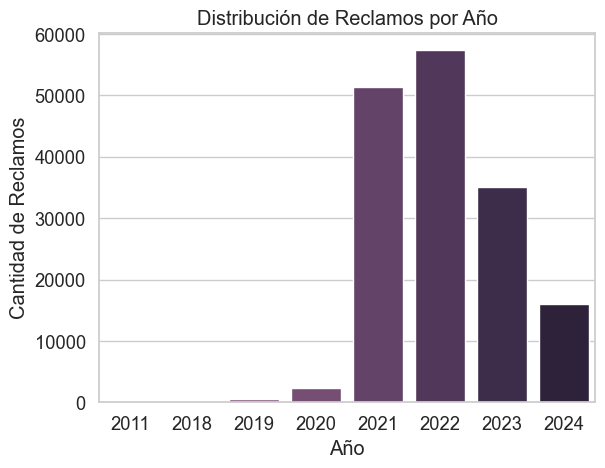

In [45]:
# Gráfico de conteo por año
sns.countplot(
    data=df, 
    x="AÑO",
    hue="AÑO",
    legend=False
)
plt.title("Distribución de Reclamos por Año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Reclamos")

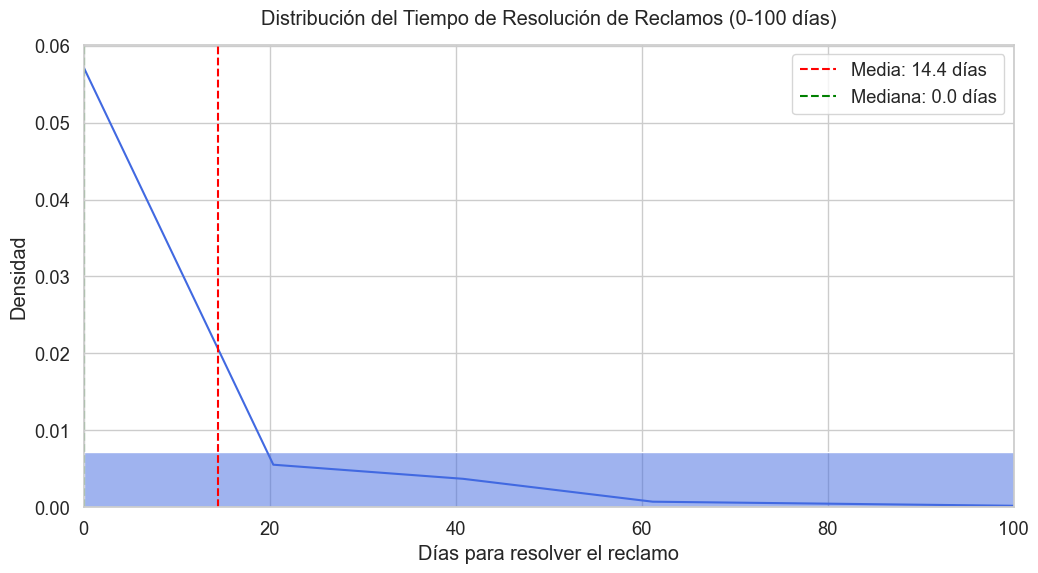

In [65]:
df = df[df['DURACION_RECLAMO'] >= 0]

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x="DURACION_RECLAMO",
    bins=30, 
    kde=True,
    color="royalblue",
    stat="density"  # Usar densidad en lugar de conteo
)
plt.title("Distribución del Tiempo de Resolución de Reclamos (0-100 días)", pad=15)
plt.xlabel("Días para resolver el reclamo")
plt.ylabel("Densidad")
plt.xlim(0, 100)

# Agregar estadísticas descriptivas
mean_duration = df["DURACION_RECLAMO"].mean()
median_duration = df["DURACION_RECLAMO"].median()
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Media: {mean_duration:.1f} días')
plt.axvline(median_duration, color='green', linestyle='--', label=f'Mediana: {median_duration:.1f} días')
plt.legend()

plt.show()

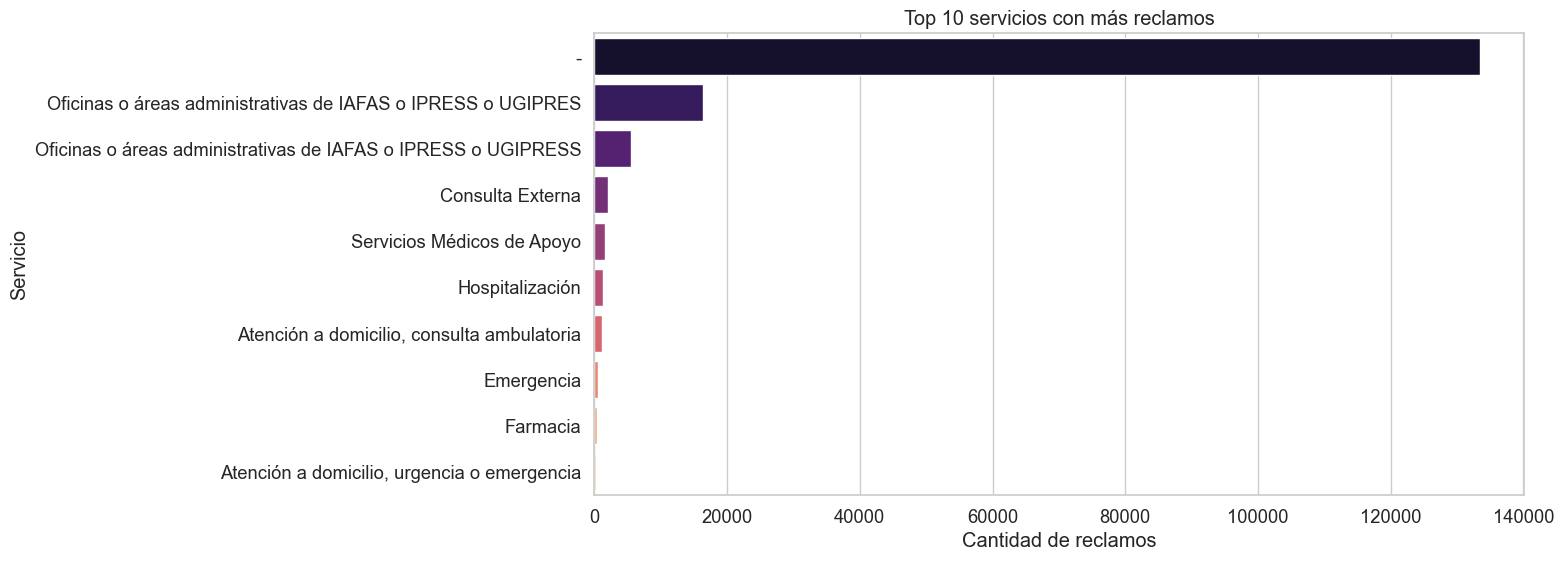

In [51]:
# Reclamos por servicio
plt.figure(figsize=(12, 6))
top_servicios = df["DE_SERVICIO"].value_counts().head(10)
sns.barplot(
    x=top_servicios.values, 
    y=top_servicios.index, 
    hue=top_servicios.index,
    legend=False,
    palette="magma")
plt.title("Top 10 servicios con más reclamos")
plt.xlabel("Cantidad de reclamos")
plt.ylabel("Servicio")
plt.show()


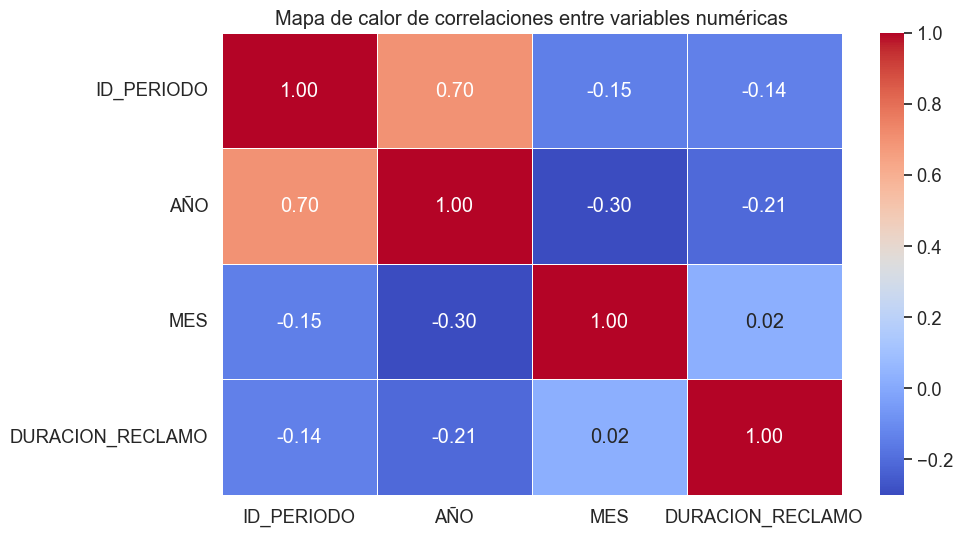

In [53]:
# Mapa de calor de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()


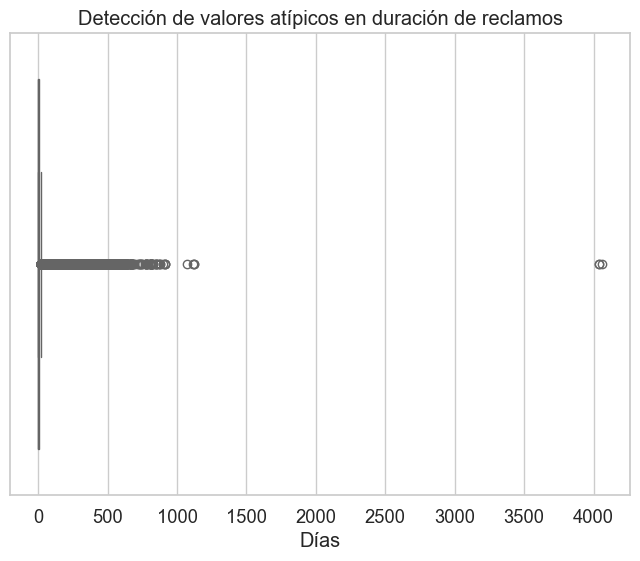

In [67]:
# Boxplot de duración de reclamos
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["DURACION_RECLAMO"], color="coral")
plt.title("Detección de valores atípicos en duración de reclamos")
plt.xlabel("Días")
plt.show()
